# カロリーコスパ

摂取エネルギー量に対してコスパがいいかどうかを分析してみる

---- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
matplotlib.style.use('ggplot')

## 利用するデータについて

Google Driveに置きました。  
https://docs.google.com/spreadsheets/d/17eY_vuqzzZHjQRhxiyT2h_P0ZiuOICulqfWoFHC9YQY/

field|意味|単位
:----|:----|----
carb|炭水化物|g
protein|タンパク質|g
fat|脂質|g
calcium|カルシウム|mg
iron|鉄分|mg
vitamin_a|ビタミンA|μg
vitamin_e|ビタミンE|mg
vitamin_b1|ビタミンB1|mg
vitamin_b2|ビタミンB2|mg
vitamin_c|ビタミンC|mg
fiber|繊維|g

In [2]:
data_url = 'https://docs.google.com/spreadsheets/d/17eY_vuqzzZHjQRhxiyT2h_P0ZiuOICulqfWoFHC9YQY/export?format=csv&gid=0'
foods_df = pd.read_csv(data_url, index_col=0)
foods_df.head(10)

,store_type,type,price_yen,calorie_k,carb,protein,fat,calcium,iron,vitamin_a,vitamin_e,vitamin_b1,vitamin_b2,vitamin_c,fiber
name,,,,,,,,,,,,,,,
スペシャルビッグフランク,convini,snack,154,332,5.3,13.8,28.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ビッグアメリカンドッグ,convini,snack,108,319,37.3,6.4,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
からあげ棒（竜田揚げ）,convini,snack,123,205,13.8,7.1,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ジューシー若鶏ザンギ,convini,snack,50,78,4.4,4.9,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ハヤシライス（羽田空港）,restaurant,food,1000,889,122.0,22.0,32.0,44.0,2.7,67.0,2.5,0.22,0.22,11.0,4.3
豚しゃぶパスタサラダ（ローソン）,convini,food,298,356,40.0,13.0,16.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
サラダチキン ハーブ（ローソン）,convini,food,210,131,1.9,27.4,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
からあげクン レッド（ローソン）,convini,snack,216,232,10.3,13.4,15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
げんこつコロッケ（ローソン）,convini,snack,148,311,26.6,7.8,19.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


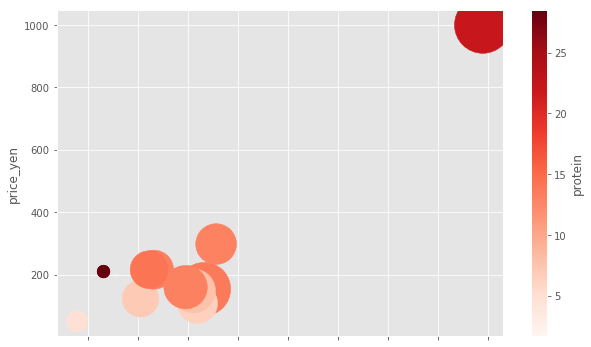

In [19]:
plt.clf()
foods_df.plot(
    kind='scatter', 
    x='calorie_k', y='price_yen', 
    c='protein', s=(foods_df['fat']+0.01) * 100,
    cmap='Reds',
    figsize=(10,6))
plt.show()

## クラスタリングなんぞしてみる

３グループぐらいにわけてみよう。


In [4]:
arr = np.array([
    foods_df['carb'].fillna(0).tolist(),
    foods_df['protein'].fillna(0).tolist(),
    foods_df['fat'].fillna(0).tolist(),
]).T
km = KMeans(n_clusters=5)
foods_df['cluster'] = km.fit_predict(arr)
foods_df.groupby('cluster')[['carb', 'protein', 'fat']].mean()

,carb,protein,fat
cluster,,,
0,10.390000,2.766667,1.500000
1,122.000000,22.000000,32.000000
2,34.633333,9.066667,17.266667
3,1.200000,27.950000,1.600000
4,11.320000,12.320000,18.000000


In [5]:
foods_df.groupby('cluster')[['carb']].count()

,carb
cluster,
0,3
1,1
2,3
3,2
4,5


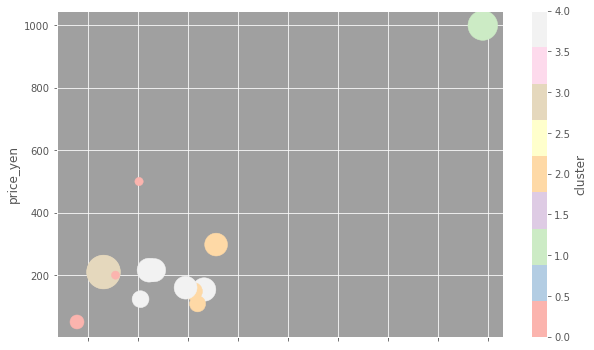

In [20]:
plt.clf()
ax = foods_df.plot(
    kind='scatter', 
    x='calorie_k', y='price_yen', 
    c='cluster', s=foods_df['protein'] * 40,
    figsize=(10,6), 
    cmap='Pastel1'
)
ax.set_facecolor('#a0a0a0')
plt.show()